##이진 데이터 학습 
one - hot vector 를 시키지 말고 

In [1]:
#import 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
#data load 
red = pd.read_csv('/content/winequality-red.csv')
white = pd.read_csv('/content/winequality-white.csv',sep = ';')

In [8]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#type 추가 
red['type'] = 0
white['type']= 1

In [10]:
#red + white 합치기 
wine = pd.concat([red,white])

In [11]:
#head
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [12]:
#shuffle 
wine_shuffle = wine.sample(frac = 1)

In [13]:
#np 
wine_np = wine_shuffle.to_numpy()

In [14]:
#train_test_index 
train_ratio = 0.8

train_test_index = int(train_ratio * wine_np.shape[0])


In [15]:
#train_test_split 
train_x,train_y = wine_np[:train_test_index,:-1] ,wine_np[:train_test_index,-1:] 
test_x,test_y = wine_np[train_test_index:,:-1] , wine_np[train_test_index:,-1:]


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(5197, 12)
(5197, 1)
(1300, 12)
(1300, 1)


In [16]:
#model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48,activation='swish',input_shape = (12,)),
                             tf.keras.layers.Dense(units = 24,activation = 'swish'),
                             tf.keras.layers.Dense(units = 12 ,activation = 'swish'),
                             tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [17]:
#model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),loss = 'binary_crossentropy',metrics=['accuracy'])

In [18]:
#model.fit
history = model.fit(train_x,train_y,epochs = 200 , batch_size= 32 ,validation_split=0.2 ,callbacks=tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',patience= 10))

Epoch 1/200
130/130 [==============================] - 1s 3ms/step - loss: 0.4850 - accuracy: 0.8913 - val_loss: 0.1807 - val_accuracy: 0.9346
Epoch 2/200
130/130 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9295 - val_loss: 0.1717 - val_accuracy: 0.9442
Epoch 3/200
130/130 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9338 - val_loss: 0.1545 - val_accuracy: 0.9433
Epoch 4/200
130/130 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.9413 - val_loss: 0.1463 - val_accuracy: 0.9471
Epoch 5/200
130/130 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9411 - val_loss: 0.1407 - val_accuracy: 0.9596
Epoch 6/200
130/130 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9452 - val_loss: 0.1448 - val_accuracy: 0.9490
Epoch 7/200
130/130 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9497 - val_loss: 0.1156 - val_accuracy: 0.9673

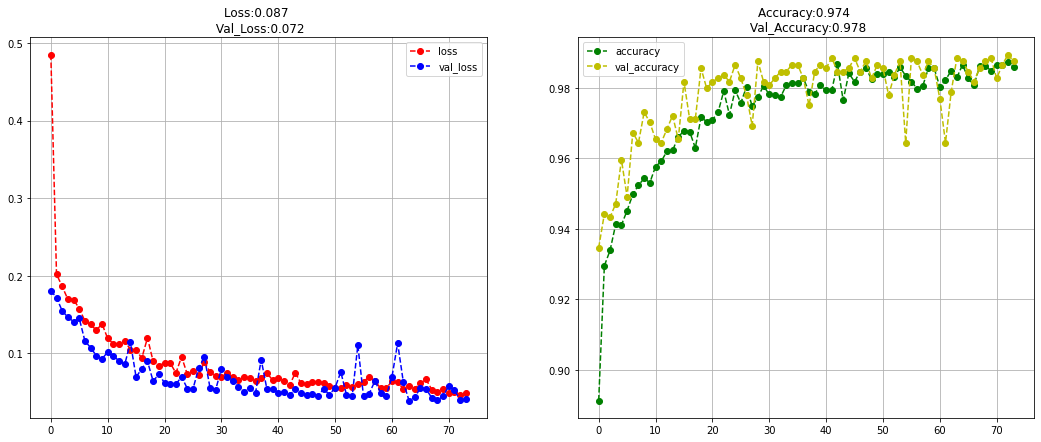

In [19]:
#시각화
plt.figure(figsize=(18,7))

loss_mean = np.mean(history.history['loss'])
val_loss_mean = np.mean(history.history['val_loss']) 
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'r--o',label = 'loss')
plt.plot(history.history['val_loss'],'b--o',label = 'val_loss')
plt.title('Loss:{:.3f} \n Val_Loss:{:.3f}'.format(loss_mean , val_loss_mean))
plt.legend()
plt.grid()

plt.subplot(1,2,2)
acc_mean = np.mean(history.history['accuracy'])
val_acc_mean = np.mean(history.history['val_accuracy'])
plt.plot(history.history['accuracy'],'g--o',label = 'accuracy')
plt.plot(history.history['val_accuracy'],'y--o',label = 'val_accuracy')
plt.title('Accuracy:{:.3f} \n Val_Accuracy:{:.3f}'.format(acc_mean,val_acc_mean))
plt.legend()
plt.grid()
plt.show()


In [20]:
#model 평가
model.evaluate(test_x,test_y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9831


[0.04902850091457367, 0.9830769300460815]

In [21]:
#model 예측 
pred_y = model.predict(test_x)

In [22]:
print(pred_y)

[[0.99261963]
 [0.9990994 ]
 [0.9919534 ]
 ...
 [0.9999372 ]
 [0.9999454 ]
 [0.99982727]]


In [23]:
print(test_y)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [24]:
np.mean(np.equal(np.round(pred_y),test_y)) 

0.9830769230769231